In [39]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Manasi/Downloads/skincare_products.csv"
skincare_data = pd.read_csv(file_path)\

# Preview the dataset
print(skincare_data.head())

                                        product_name  \
0  The Ordinary Natural Moisturising Factors + HA...   
1      CeraVe Facial Moisturising Lotion SPF 25 52ml   
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3          AMELIORATE Transforming Body Lotion 200ml   
4                     CeraVe Moisturising Cream 454g   

                                         product_url product_type  \
0  https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser   
1  https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser   
2  https://www.lookfantastic.com/the-ordinary-hya...  Moisturiser   
3  https://www.lookfantastic.com/ameliorate-trans...  Moisturiser   
4  https://www.lookfantastic.com/cerave-moisturis...  Moisturiser   

                                         ingredients   price  
0  Aqua (Water), Caprylic/Capric Triglyceride, Ce...   £5.20  
1  Aqua/Water, Homosalate, Glycerin, Octocrylene,...  £13.00  
2  Aqua (Water), Sodium Hyaluronate, Sodium Hyalu...   £6.2

In [7]:
import numpy as np

# Convert price to numeric by removing '£' and convert ingredient lists into counts
skincare_data['price_numeric'] = skincare_data['price'].str.replace('£', '').astype(float)
skincare_data['num_ingredients'] = skincare_data['ingredients'].str.split(',').apply(len)

# Prepare data for clustering (price and number of ingredients)
X_clustering = skincare_data[['price_numeric', 'num_ingredients']].dropna()

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 10)
sse = []  # Sum of squared errors for each k
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    sse.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(X_clustering, kmeans.labels_))

# Determine the optimal k based on the silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = best_kmeans.fit_predict(X_clustering)

# Add the cluster labels to the original dataset
skincare_data['cluster'] = clusters

In [14]:
print("Price Range:")
print("Minimum Price:", skincare_data['price_numeric'].min())
print("Maximum Price:", skincare_data['price_numeric'].max())

Price Range:
Minimum Price: 1.95
Maximum Price: 230.0


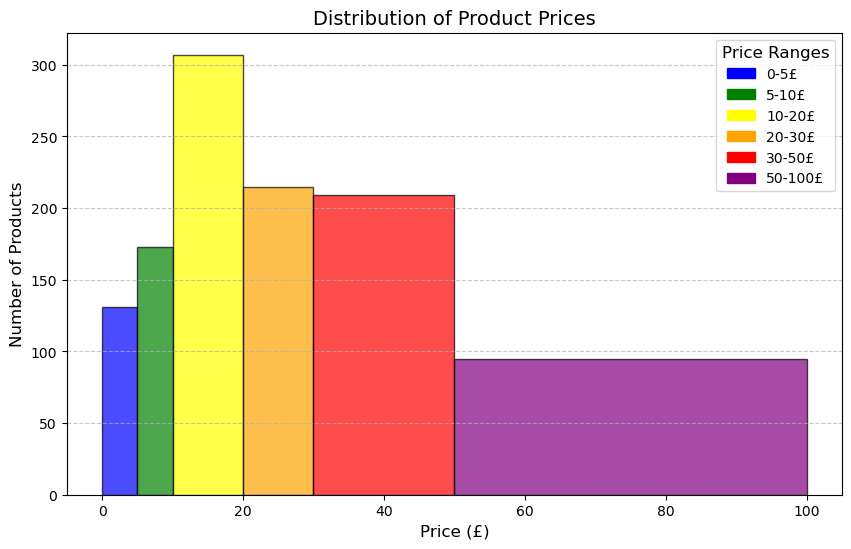

In [15]:
# Adjust the bins dynamically based on price range
bins = [0, 5, 10, 20, 30, 50, 100]  # Adjust these bins based on the price range
colors = ['blue', 'green', 'yellow', 'orange', 'red', 'purple']  # Define colors for bins
labels = [f'{bins[i]}-{bins[i+1]}£' for i in range(len(bins)-1)]  # Define labels

plt.figure(figsize=(10, 6))

# Histogram
n, bins, patches = plt.hist(skincare_data['price_numeric'], bins=bins, edgecolor='black', alpha=0.7)

# Apply colors to patches (bars)
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Add title, labels, and legend
plt.title('Distribution of Product Prices', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in colors], 
           labels=labels, title="Price Ranges", fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

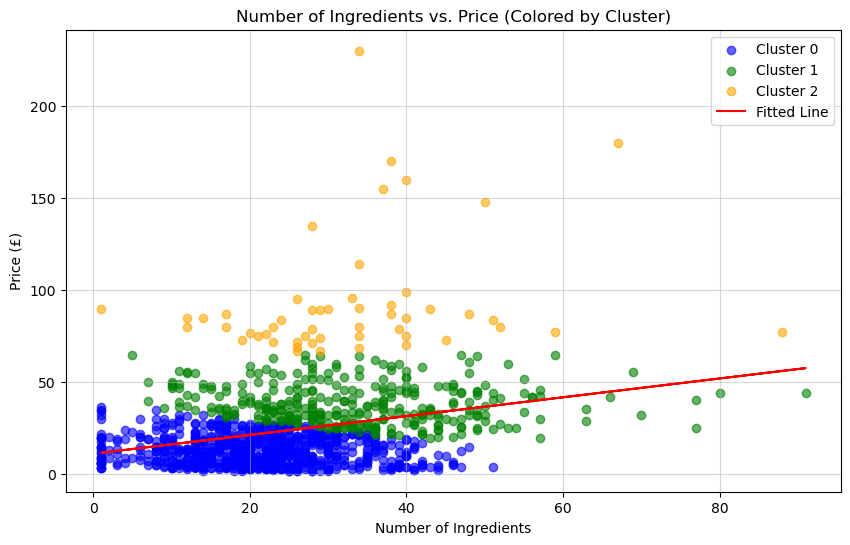

In [17]:
import numpy as np

# Scatter plot: Number of ingredients vs. Price, colored by cluster
plt.figure(figsize=(10, 6))
for cluster, color in enumerate(colors):
    cluster_data = skincare_data[skincare_data['cluster'] == cluster]
    plt.scatter(cluster_data['num_ingredients'], cluster_data['price_numeric'], 
                alpha=0.6, color=color, label=f'Cluster {cluster}')

# Line fitting for the entire dataset
x_values = skincare_data['num_ingredients']
y_values = skincare_data['price_numeric']
m, b = np.polyfit(x_values, y_values, 1)  # Linear regression
plt.plot(x_values, m * x_values + b, color='red', label='Fitted Line')

# Add labels and legend
plt.title('Number of Ingredients vs. Price (Colored by Cluster)')
plt.xlabel('Number of Ingredients')
plt.ylabel('Price (£)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

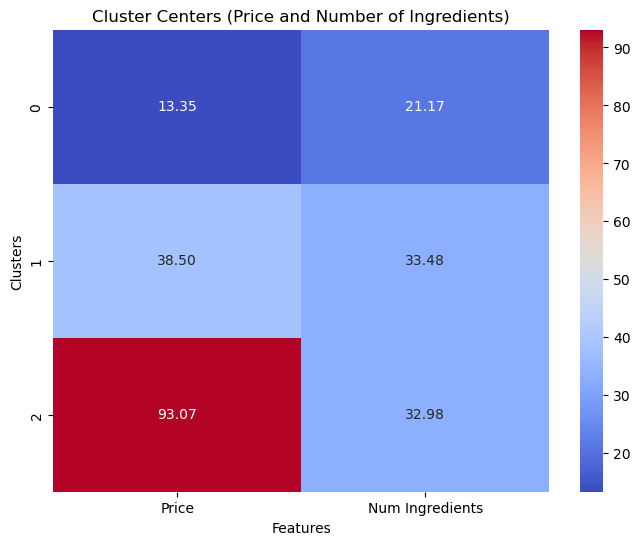

In [18]:
import seaborn as sns

# Create a DataFrame for cluster centers
heatmap_data = pd.DataFrame(best_kmeans.cluster_centers_, columns=['Price', 'Num Ingredients'])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add labels
plt.title('Cluster Centers (Price and Number of Ingredients)')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(ticks=[0.5, 1.5], labels=['Price', 'Num Ingredients'], rotation=0)
plt.show()

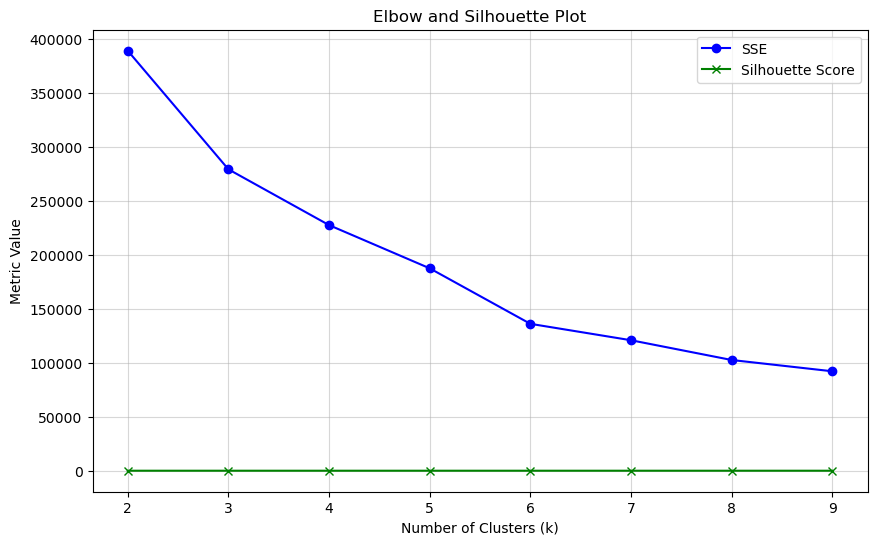

In [19]:
# Elbow plot
k_values = range(2, 10)
sse = []  # Sum of squared errors
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    sse.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(X_clustering, kmeans.labels_))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', label='SSE', color='blue')
plt.plot(k_values, silhouette_scores, marker='x', label='Silhouette Score', color='green')

# Add labels and legend
plt.title('Elbow and Silhouette Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(alpha=0.5)
plt.show()